In [1]:
x = 1/49

0.02040816326530612

In [2]:
x * 49

0.9999999999999999

In [3]:
1 - x * 49

1.1102230246251565e-16

In [4]:
# 1.5 is exactly represented in binary floating point:
1.5 == 3 // 2

true

In [5]:
# 0.1 is *not* exactly represented
0.1 == 1 // 10

false

In [6]:
function my_cumsum(x)
    y = similar(x) # allocate an array of the same type and size as x
    y[1] = x[1]
    for i = 2:length(x)
        y[i] = y[i-1] + x[i]
    end
    return y
end

my_cumsum (generic function with 1 method)

  0.001650 seconds (2 allocations: 3.815 MiB)


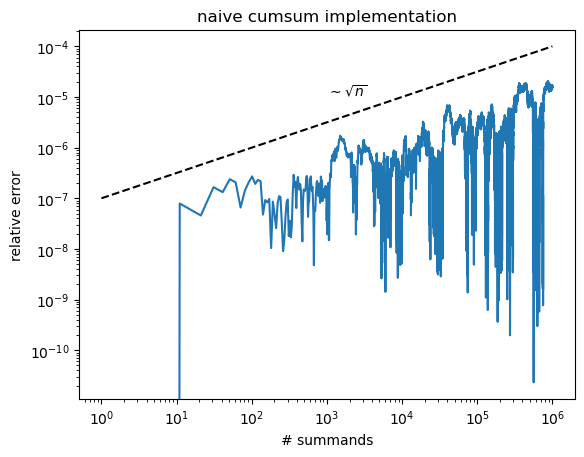

PyObject Text(0.5, 1.0, 'naive cumsum implementation')

In [8]:
x = rand(Float32, 10^7) # 10^7 single-precision values uniform in [0,1)
@time y = my_cumsum(x)
yexact = my_cumsum(Float64.(x)) # same thing in double precision
err = abs.(y .- yexact) ./ abs.(yexact) # relative error in y

using PyPlot
n = 1:10:length(err) # downsample by 10 for plotting speed
loglog(n, err[n])
ylabel("relative error")
xlabel("# summands")
# plot a √n line for comparison
loglog([1,length(err)], sqrt.([1,length(err)]) * 1e-7, "k--")
text(1e3,1e-5, L"\sim \sqrt{n}")
title("naive cumsum implementation")